# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import numpy as np

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

#### From lecture 3
As provided, the data set contains the following columns: 

- `ID`: the ID number of the station. We can use this to figure out which country the station is in, as well as the spatial location of the station. 
- `Year`: the year of the measurement. 
- `VALUE1`-`VALUE12`: the temperature measurements themselves. `VALUE1` contains the temperature measurements for January, `VALUE2` for February, and so on. 
- The measurements are in hundredths of a degree, Celsius. 

In [2]:
interval1 = "1901-1910"
interval2 = "2011-2020"

url1 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/{interval1}.csv"
url2 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/{interval2}.csv"

# Reads the csv files
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

# Shows the number of rows and columns of df1
print(df1.shape)

# Output the first few rows of df1, default value is 5
df1.head()

# VALUE1-VALUE12 is January - December

(41463, 14)


,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0


In [3]:
# Shows the number of rows and columns of df2
print(df2.shape)

# Output the first few rows of df2
df2.head(6)

(139758, 14)


,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,ACW00011604,2011,-83.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0,987.0,721.0,428.0
1,ACW00011604,2012,121.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0,826.0,620.0,-234.0
2,ACW00011604,2013,-104.0,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0,1042.0,601.0,NaN
3,AE000041196,2011,1950.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0,2940.0,2390.0,1905.0
4,AE000041196,2012,1837.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AE000041196,2013,NaN,NaN,NaN,2797.0,3095.0,3343.0,3664.0,3599.0,3414.0,2978.0,2492.0,2106.0


In [4]:
# Combining the dataframes using pandas.concat
concat_df = pd.concat([df1, df2])
concat_df

# shape of df1 is (41463, 14), shape of df2 is (139758, 14) so this means the results match the rows and columns of the new dataframe

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns:
- the ID number of the station
- the year of the measurement
- the temperature measurements (Jan - Dec in degrees C)
- country name
- Latitude
- Longitude
- station name (NAME column in station_metadata.csv)


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [5]:
# Two different ways to read the two csv files
fips_url = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
fips_df = pd.read_csv(fips_url)

station_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

In [6]:
print(fips_df.shape)
fips_df.head()

(279, 3)


,FIPS 10-4,ISO 3166,Name
0,AF,AF,Afghanistan
1,AX,-,Akrotiri
2,AL,AL,Albania
3,AG,DZ,Algeria
4,AQ,AS,American Samoa


In [7]:
print(station_df.shape)
station_df.head()

(27585, 5)


,ID,LATITUDE,LONGITUDE,STNELEV,NAME
0,ACW00011604,57.7667,11.8667,18.0,SAVE
1,AE000041196,25.3330,55.5170,34.0,SHARJAH_INTER_AIRP
2,AEM00041184,25.6170,55.9330,31.0,RAS_AL_KHAIMAH_INTE
3,AEM00041194,25.2550,55.3640,10.4,DUBAI_INTL
4,AEM00041216,24.4300,54.4700,3.0,ABU_DHABI_BATEEN_AIR


In [8]:
'''
Create a new dataframe which includes the following columns:
    Part 2.1
    - the ID number of the station
    - the year of the measurement
    - the temperature measurements (Jan - Dec in degrees C)

    Part 2.2
    - Latitude
    - Longitude
    - station name (NAME column in station_metadata.csv)
    - country name
'''

# All of the columns in Part 2.1 is already a part of the dataframe concat_df that we made in Part 1.
# Since latitude and longitude and station name is part of the station_df, we can use pd.merge
    # on concat_df and station_df since they share the same column of ID

merged_df = pd.merge(concat_df, station_df, on=["ID"])
merged_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,STNELEV,NAME
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181216,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0,-20.2000,32.616,1132.0,CHIPINGE
181217,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0,-20.2000,32.616,1132.0,CHIPINGE
181218,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN,-20.2000,32.616,1132.0,CHIPINGE
181219,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0,-20.2000,32.616,1132.0,CHIPINGE


In [9]:
## Creates a new column in dataframe merged_df called FIPS 10-4. The column will contain the first two characters
## of the values in the ID column of the dataframe merged_df.
merged_df['FIPS 10-4'] = merged_df['ID'].str[0:2] ## Recall that this index includes 0, 1, but not 2
merged_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,STNELEV,NAME,FIPS 10-4
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181216,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0,-20.2000,32.616,1132.0,CHIPINGE,ZI
181217,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0,-20.2000,32.616,1132.0,CHIPINGE,ZI
181218,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN,-20.2000,32.616,1132.0,CHIPINGE,ZI
181219,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0,-20.2000,32.616,1132.0,CHIPINGE,ZI


In [10]:
## Combines the merged_df and fips_df together using the common column FIPS 10-4
# Merge the two dataframes, check this link for more info: https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
merged_df = pd.merge(merged_df, fips_df, on=['FIPS 10-4'])
merged_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,...,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,STNELEV,NAME,FIPS 10-4,ISO 3166,Name
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,...,1604.0,1364.0,1004.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,...,1694.0,1494.0,1134.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,...,1926.0,1356.0,1056.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,...,1826.0,1376.0,1246.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,...,1716.0,1386.0,1076.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,...,NaN,2298.0,2199.0,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe
181311,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,...,1967.0,2258.0,2142.0,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe
181312,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.0,2297.0,NaN,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe
181313,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,...,2290.0,2230.0,2405.0,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe


In [11]:
# Remove unnecessary columns
merged_df = merged_df.drop(["STNELEV", "FIPS 10-4", "ISO 3166"], axis=1) # axis=0 is row, axis=1 is the column
merged_df

'''
RECAP:
    VALUE1-VALUE12 is the months January - December
    NAME is the name of the station
    Name is the country's name
'''

"\nRECAP:\n    VALUE1-VALUE12 is the months January - December\n    NAME is the name of the station\n    Name is the country's name\n"

In [12]:
# Renames some columns
merged_df = merged_df.rename(columns = {"NAME" : "Station", "Name" : "Country"})
merged_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,Station,Country
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0,-20.2000,32.616,CHIPINGE,Zimbabwe
181311,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0,-20.2000,32.616,CHIPINGE,Zimbabwe
181312,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN,-20.2000,32.616,CHIPINGE,Zimbabwe
181313,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0,-20.2000,32.616,CHIPINGE,Zimbabwe


In [13]:
merged_df = merged_df.set_index(keys = ["ID", "Year", "Station", "Country", "LATITUDE", "LONGITUDE"])
merged_df

VALUE1  \
ID          Year Station            Country  LATITUDE LONGITUDE           
AG000060390 1901 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1034.0   
            1902 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250       984.0   
            1903 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1144.0   
            1904 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250       926.0   
            1905 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250       906.0   
...                                                                 ...   
ZI000067983 2012 CHIPINGE           Zimbabwe -20.2000 32.616     2186.0   
            2013 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   
            2014 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   
            2015 CHIPINGE           Zimbabwe -20.2000 32.616     2175.0   
            2016 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   

                                                                 VALUE2  \
ID          Year Station            Country  LATITUDE LONGITUDE           
AG000060390 1901 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250       844.0   
            1902 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1194.0   
            1903 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1064.0   
            1904 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1126.0   
            1905 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250       866.0   
...                                                                 ...   
ZI000067983 2012 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   
            2013 CHIPINGE           Zimbabwe -20.2000 32.616     2163.0   
            2014 CHIPINGE           Zimbabwe -20.2000 32.616     2187.0   
            2015 CHIPINGE           Zimbabwe -20.2000 32.616     2251.0   
            2016 CHIPINGE           Zimbabwe -20.2000 32.616     2285.0   

                                                                 VALUE3  \
ID          Year Station            Country  LATITUDE LONGITUDE           
AG000060390 1901 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1164.0   
            1902 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1254.0   
            1903 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1266.0   
            1904 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1136.0   
            1905 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1386.0   
...                                                                 ...   
ZI000067983 2012 CHIPINGE           Zimbabwe -20.2000 32.616     2157.0   
            2013 CHIPINGE           Zimbabwe -20.2000 32.616     2054.0   
            2014 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   
            2015 CHIPINGE           Zimbabwe -20.2000 32.616     2083.0   
            2016 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   

                                                                 VALUE4  \
ID          Year Station            Country  LATITUDE LONGITUDE           
AG000060390 1901 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1534.0   
            1902 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1544.0   
            1903 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1346.0   
            1904 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1406.0   
            1905 ALGER_DAR_EL_BEIDA Algeria   36.7167 3.250      1576.0   
...                                                                 ...   
ZI000067983 2012 CHIPINGE           Zimbabwe -20.2000 32.616     1833.0   
            2013 CHIPINGE           Zimbabwe -20.2000 32.616     1870.0   
            2014 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   
            2015 CHIPINGE           Zimbabwe -20.2000 32.616     1952.0   
            2016 CHIPINGE           Zimbabwe -20.2000 32.616        NaN   

                                                                 VALUE5  \
ID          Year Station            Country  LATITUDE LONGITUDE           
AG000060390

In [14]:
merged_df = merged_df.stack()
merged_df

ID           Year  Station             Country   LATITUDE  LONGITUDE         
AG000060390  1901  ALGER_DAR_EL_BEIDA  Algeria    36.7167  3.250      VALUE1     1034.0
                                                                      VALUE2      844.0
                                                                      VALUE3     1164.0
                                                                      VALUE4     1534.0
                                                                      VALUE5     1564.0
                                                                                  ...  
ZI000067983  2016  CHIPINGE            Zimbabwe  -20.2000  32.616     VALUE5     1692.0
                                                                      VALUE6     1681.0
                                                                      VALUE8     1828.0
                                                                      VALUE10    2334.0
                                          

In [15]:
merged_df = merged_df.reset_index()
merged_df

,ID,Year,Station,Country,LATITUDE,LONGITUDE,level_6,0
0,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE1,1034.0
1,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE2,844.0
2,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE3,1164.0
3,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE4,1534.0
4,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE5,1564.0
...,...,...,...,...,...,...,...,...
1899682,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE5,1692.0
1899683,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE6,1681.0
1899684,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE8,1828.0
1899685,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE10,2334.0


In [16]:
# Renames some columns
merged_df = merged_df.rename(columns = {"level_6" : "Month", 0 : "Temperature (C)"})
merged_df

,ID,Year,Station,Country,LATITUDE,LONGITUDE,Month,Temperature (C)
0,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE1,1034.0
1,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE2,844.0
2,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE3,1164.0
3,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE4,1534.0
4,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.250,VALUE5,1564.0
...,...,...,...,...,...,...,...,...
1899682,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE5,1692.0
1899683,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE6,1681.0
1899684,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE8,1828.0
1899685,ZI000067983,2016,CHIPINGE,Zimbabwe,-20.2000,32.616,VALUE10,2334.0


In [17]:
merged_df["Month"] = merged_df["Month"].str[5:].astype(int)
merged_df.head(13)

,ID,Year,Station,Country,LATITUDE,LONGITUDE,Month,Temperature (C)
0,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,1,1034.0
1,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,2,844.0
2,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,3,1164.0
3,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,4,1534.0
4,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,5,1564.0
5,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,6,2354.0
6,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,7,2444.0
7,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,8,2364.0
8,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,9,2214.0
9,AG000060390,1901,ALGER_DAR_EL_BEIDA,Algeria,36.7167,3.25,10,1604.0


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [18]:
def query_climate(df, country, year_begin, year_end, month):
    df = df.reset_index()
    filtered_df = df[(df['Country'] == country) & 
                     (df['Year'] >= year_begin) &
                     (df['Year'] <= year_end) &
                     (df['Month'] == month)]
    
    result = filtered_df[['Station', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temperature (C)']]
    result = result.rename(columns={'Temperature (C)': 'Temp'})
    result['Temp'] = result['Temp'] / 100
    
    return result[['Station', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']]

Run this example and check if you get the correct result, your obtained dataframe looks like:

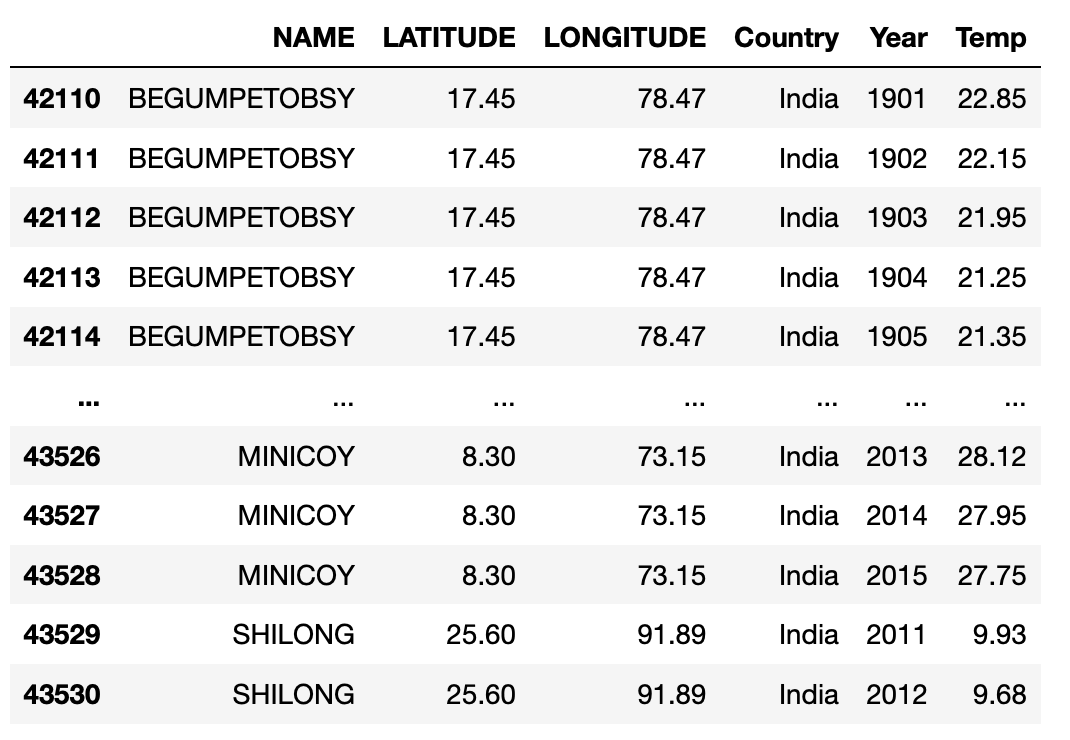

In [19]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = merged_df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,Station,LATITUDE,LONGITUDE,Country,Year,Month,Temp
78658,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
78670,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
78682,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
78694,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
78706,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
780139,SILCHAR,24.82,92.83,India,2015,1,20.65
780143,TRIVANDRUM,8.50,77.00,India,2015,1,27.50
780147,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2013,1,15.30
780157,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

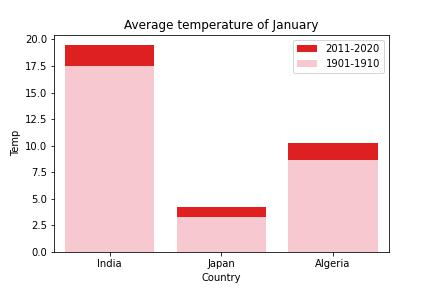

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

## Publish (5 pts)

Publish your work on quarto and github:

1. Publish your work using `quarto publish`. Please include your blog link. 

2. Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link. 